# Introduction

In the intricate financial markets, individual investors often find themselves at a disadvantage, lacking the depth of understanding and expertise that professional analysts bring to the table. To bridge this gap, I harness my newly acquired skills in natural language processing (NLP) with an ambitious goal: to obtain investment insights from the vast ocean of financial news. By utilizing the rich dataset provided by the HuffPost, which includes news articles spanning from January 2012 to September 2022, encompassing approximately 210,000 unique news data.

Central to my analysis are the stocks nicknames as "Magnificent Seven"(M7): Alphabet, Amazon, Apple, Meta, Microsoft, Nvidia, and Tesla. These high-performing companies are cornerstones of the U.S. market and key drivers of the global economy through their technological innovation, market dominance, and robust financial achievements. Their significant impact makes them prime subjects for exploring how linguistic patterns in financial news may offer predictive insights into stock movements. Using spaCy, an advanced NLP library, along with the tf-idf technique, I aim to develop a predictive model for the financial market.


My research question is:

Can market conditions, such as bull and bear markets, be distinguished using tf-idf metrics? If so, what specific terms or features most accurately indicate market trends?

This research will focus on the M7 companies to represent the market.

The analysis employs the weekly percentage change in stock index price as the performance indicator. Weeks with a positive percentage change from the previous week are labeled 'bull' markets, whereas those with a negative change are deemed 'bear' markets. The study will aggregate data for the seven companies from Yahoo Finance into a comprehensive index, with details on this aggregation methodology provided in the data section.

This project seeks to demystify the complex language of finance through NLP. By pinpointing language patterns that align with stock performance and market trends, this research not only aims to make financial analysis more accessible to individual investors but also enhances our collective understanding of the influence of information dissemination on market behavior.

# Method

## Data


### HuffPost News Data

The dataset comprises approximately 210,000 news headlines collected from HuffPost between 2012 and 2022, making it one of the largest archives of its kind and a valuable benchmark for computational linguistics tasks. The collection spans a decade of news coverage, with a significant portion (about 200,000 headlines) from 2012 to May 2018. Following changes to HuffPost's archival policies, the dataset includes a smaller subset (around 10,000 headlines) from May 2018 to 2022. 

Each record within the dataset is consisted of several attributes:

- `'category'`: The news category under which the article was published, encompassing a wide range of subjects including politics, wellness, entertainment, travel, style & beauty, parenting, healthy living, among others.
- `'headline'`: The article's title, capturing the essence of the news item.
- `'authors'`: Names of the contributors to the article.
- `'link'`: A URL directing to the full article on the HuffPost website.
- `'short_description'`: An abstract summarizing the article's content.
- `'date'`: The publication date, documenting the article's timeliness.


The data was obtained from Kaggle and the more information can be found at:
https://www.kaggle.com/datasets/rmisra/news-category-dataset?resource=download

### Yahoo Finance

We will source our primary stock data from the Yahoo Finance API, a comprehensive suite of libraries, APIs, and methods designed to provide historical and real-time data across various financial markets. Our focus will be extracting data for seven key companies, from the same duration of the news dataset from 2012 to 2022 

Our variable of interest are:

- The `'Date'` is the date of the stock exchange.
- The `'ticker'` is an abbreviated symbols representing company names.
- The `'adjusted close price'` is the value of a stock after adjusting for any corporate actions, ensuring that our calculations are precise and meaningful.
- The `'equal_weight_index'` is an aggregated stock index number that incorporates the 7 stocks with equal weight for simplicity.

We will construct an index with equal weighting for these companies. This aggregated index approach simplifies the complex fluctuations of the stock market into a single metric, facilitating an easier comparison and analysis of overall market performance.

Our analysis will pivot around the monthly change as a performance indicator, distinguishing between bull and bear markets. This method will not only highlight the general market direction but also provide insights into the volatility and potential trends within these periods.

## Linguistic Analysis

### 1) TF-IDF

The term frequency-inverse document frequency (tf-idf) technique is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. It is achieved by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents. This results in words that are common in a specific document but rare in the overall document set being assigned a high score, highlighting their importance in the context of that document.

In the context of this project, tf-idf is employed to sift through thousands of financial news articles to identify and weigh the significance of words that are most relevant to stock market movements. By analyzing the frequency and importance of specific terms in news articles related to the "Magnificent Seven" companies, the technique aids in pinpointing linguistic patterns that may have predictive power over stock market trends. It allows us to quantify the impact of certain keywords or phrases on market conditions, distinguishing between common language and terms that could signal shifts in the financial landscape.


## Statistical Analysis

### 1) Logistic Regression
Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is measured with a two variables. In the context of our project, Logistic Regression is used to predict the market condition (bull or bear) based on the TF-IDF scores of terms found in financial news articles. By modeling the relationship between the terms' TF-IDF scores and the market's direction, we can assess the likelihood of market movements based on current news trends, making it a powerful tool for forecasting.

### 2) Naive Bayes
Naive Bayes is a simple probabilistic classifier based on applying Bayes' theorem with strong (naive) independence assumptions between the features. It is particularly suited for high-dimensional data, making it an excellent choice for text classification problems. In our project, Naive Bayes is employed to classify news articles as indicators of either bull or bear markets, using the frequency of text features transformed through TF-IDF. 

### 3) Gradient Boosting
Gradient Boosting is an ensemble technique that creates a prediction model by combining the strengths of multiple weak models, typically decision trees. It builds the model in a stage-wise fashion and generalizes them by allowing optimization of an arbitrary differentiable loss function. Within our project, Gradient Boosting is leveraged to predict market trends based on the aggregated TF-IDF features of financial news articles. This method is particularly useful for reducing bias and variance in our predictions, offering a more nuanced understanding of how specific terms or combinations of terms in the news correlate with market movements.


## NLP Analysis

The following steps outline the analysis process:

1. Load the pre-processed news dataset alongside stock index data aggregated via the Yahoo Finance API.
2. Utilize the spaCy library for text processing, leveraging its advanced NLP pipeline.
3. Calculate TF-IDF scores, displaying the top 40 indicative words for both bull and bear markets.
4. Evaluate model performance, identifying areas of improvement.
5. Extract and exclude stop words identified from the analysis, then re-run the models.
6. Contrast the outcomes between the original models and those refined by stop word removal, examining the impact on predictive accuracy.

## 1. Pre-process Data

Our dataset comprises news articles spanning various sectors. We will refine our dataset by selecting only the articles relevant to these M7 companies. This selection process involves using company names and stock tickers as keywords to filter articles, ensuring our analysis is focused and relevant to our specified entities. After this filtering process, we were able to reduce the number of articles from 209,527 to 2,634.

### Reading the News Data

In [2]:
import pandas as pd
import numpy as np
news_df = pd.read_json('News_Category_Dataset_v3.json', lines=True)
news_df.shape

(209527, 6)

In [3]:
# Keywords for the "Magnificent Seven" companies
m7_keywords = ['Alphabet', 'Google','GOOGL', 'Amazon', 'AMZN', 'Apple','AAPL', 'Meta', 'Facebook', 'Microsoft', 'MSFT', 'Nvidia','NVDA', 'Tesla', 'TSLA']

def filter_m7_companies(df):
    # This function checks if any of the m7 keywords are in the 'short_description' column
    return df[df['short_description'].apply(lambda x: any(keyword in x for keyword in m7_keywords))]

In [4]:
# Apply the filtering function
news_df = filter_m7_companies(news_df)

print(news_df.shape)

(2634, 6)


### Remove Duplicates

In [5]:
# Remove duplicates based only on the 'short_description' column
news_df = news_df.drop_duplicates(subset=['short_description'])

# Alternatively, consider all columns when checking for duplicates
news_df = news_df.drop_duplicates()

# Check the shape of the DataFrame after removing duplicates
print("Number of entries after removing duplicates:", news_df.shape)

Number of entries after removing duplicates: (2347, 6)


### Remove Promotional Contents 

Upon reviewing the news_df['short_description'] contents, I discovered some repeating promotional contents. Few examples are shown below:
- Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. Between

- Keep in touch! Check out HuffPost Weddings on Facebook, Twitter and Pinterest. Check out more hilarious last-name fails in

- Have something to say?

- Follow Tia Ghose on Twitter and Google+. Follow us @livescience, Facebook & Google+. Original article on LiveScience. To

- See Camilla's style evolution! Check 'em out. Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr

So then, I decided to remove the entries strating with 'Want more?" and 'Keep in touch!'

In [6]:
def remove_promotional_content(df):
    """
    Removes rows from the DataFrame where 'short_description' starts with certain promotional phrases or contains 'HuffPost'.
    """
    # Define a list of promotional starters
    promotional_starters = ['Want more?', 'Keep in touch!', 'Have something to say?', 'Follow']
    
    # Check if the 'short_description' starts with any of the promotional phrases
    condition_starts = df['short_description'].apply(lambda x: not any(x.startswith(phrase) for phrase in promotional_starters))
    
    # Check if the 'short_description' contains 'HuffPost'
    condition_contains_huffpost = ~df['short_description'].str.contains('HuffPost', case=False)
    
    # Combine conditions: entries should meet both conditions
    combined_condition = condition_starts & condition_contains_huffpost
    
    # Filter the DataFrame based on the combined condition
    return df[combined_condition]

# Apply the function to remove promotional content and entries containing 'HuffPost'
news_df = remove_promotional_content(news_df)

# Show the shape or a few rows of the DataFrame to verify changes
print("Number of entries after removing promotional content and 'HuffPost' mentions:", news_df.shape)
news_df.head()


Number of entries after removing promotional content and 'HuffPost' mentions: (1390, 6)


,link,headline,category,short_description,authors,date
185,https://www.huffpost.com/entry/lost-wedding-ri...,Metal-Detecting Stranger Retrieves Woman’s Rin...,U.S. NEWS,Francesca Teal's plea for help on Facebook got...,,2022-08-21
452,https://www.huffpost.com/entry/instagram-faceb...,Instagram And Facebook Remove Posts Offering A...,TECH,Facebook and Instagram began removing some of ...,"Amanda Seitz, AP",2022-06-28
529,https://www.huffpost.com/entry/blake-lemoine-l...,Google Engineer On Leave After He Claims AI Pr...,TECH,Artificially intelligent chatbot generator LaM...,Mary Papenfuss,2022-06-12
585,https://www.huffpost.com/entry/a-new-labor-mov...,WATCH LIVE — A New Labor Movement: How Workers...,POLITICS,Tune in on July 20 to watch our panel discussi...,Amanda Terkel,2022-06-01
679,https://www.huffpost.com/entry/mug-shots-ruin-...,Facebook Is Still Allowing Mug Shots Even Thou...,TECH,When an individual’s mug shot goes viral on Fa...,Jessica Schulberg,2022-05-14


### Remove Specific Terms List

In [7]:
def remove_unwanted_words(text):
    unwanted_words = ['@huffpost']
    return ' '.join(word for word in text.split() if word not in unwanted_words)

# Apply the cleaning function
news_df['short_description'] = news_df['short_description'].apply(remove_unwanted_words)


### Remove the texts starting with '@' and '#'

In [8]:
import re
def clean_text(text):
    # Remove handles and hashtags
    text = re.sub(r'@\w+', '', text)  # Removes words starting with '@'
    text = re.sub(r'#\w+', '', text)  # Removes words starting with '#'
    return text

# Apply the cleaning function
news_df['short_description'] = news_df['short_description'].apply(clean_text)


In [9]:
news_df.shape

(1390, 6)

In [10]:
from collections import Counter

# Concatenate all text to analyze
all_text = ' '.join(news_df['short_description']).lower()  # Convert to lower case to ensure consistency

# Tokenize the text
words = all_text.split()

# Count word frequencies
word_counts = Counter(words)

# Display the most common words
print(word_counts.most_common(50))

[('the', 1550), ('to', 862), ('a', 840), ('and', 781), ('of', 719), ('facebook', 515), ('on', 469), ('in', 457), ('for', 331), ('is', 321), ('that', 305), ('i', 251), ('with', 214), ('apple', 191), ('it', 188), ('google', 178), ('as', 170), ('you', 166), ('be', 157), ('was', 155), ('has', 152), ('are', 151), ('this', 147), ('by', 137), ('have', 136), ('an', 134), ('from', 132), ('we', 129), ('but', 125), ('or', 112), ('my', 110), ('new', 108), ('at', 106), ('about', 105), ('its', 102), ('your', 102), ('amazon', 102), ('more', 101), ('out', 100), ('when', 90), ('their', 88), ('--', 85), ('will', 82), ('all', 82), ('his', 81), ('not', 80), ('one', 79), ('facebook,', 77), ('they', 77), ('who', 76)]


## 2. Weekly Aggregation

In [11]:
news_df.shape

(1390, 6)

In [12]:
news_df.head()

,link,headline,category,short_description,authors,date
185,https://www.huffpost.com/entry/lost-wedding-ri...,Metal-Detecting Stranger Retrieves Woman’s Rin...,U.S. NEWS,Francesca Teal's plea for help on Facebook got...,,2022-08-21
452,https://www.huffpost.com/entry/instagram-faceb...,Instagram And Facebook Remove Posts Offering A...,TECH,Facebook and Instagram began removing some of ...,"Amanda Seitz, AP",2022-06-28
529,https://www.huffpost.com/entry/blake-lemoine-l...,Google Engineer On Leave After He Claims AI Pr...,TECH,Artificially intelligent chatbot generator LaM...,Mary Papenfuss,2022-06-12
585,https://www.huffpost.com/entry/a-new-labor-mov...,WATCH LIVE — A New Labor Movement: How Workers...,POLITICS,Tune in on July 20 to watch our panel discussi...,Amanda Terkel,2022-06-01
679,https://www.huffpost.com/entry/mug-shots-ruin-...,Facebook Is Still Allowing Mug Shots Even Thou...,TECH,When an individual’s mug shot goes viral on Fa...,Jessica Schulberg,2022-05-14


In [13]:
# Convert 'date' to datetime and sort the DataFrame by this column
news_df['date'] = pd.to_datetime(news_df['date'])
news_df.sort_values('date', inplace=True)

# Group by the publication week and aggregate text
weekly_aggregated_text = news_df.groupby(news_df['date'].dt.to_period('W'))['short_description'].apply(' '.join)

# Convert the PeriodIndex to DateTimeIndex (to the last day of each week)
weekly_aggregated_text.index = weekly_aggregated_text.index.to_timestamp(how='end')

In [14]:
# Change the date format of the index
weekly_aggregated_text.index = weekly_aggregated_text.index.strftime('%Y-%m-%d')

print(weekly_aggregated_text)

date
2012-01-29    For the most part, teens' experience on Google...
2012-02-05    My concern is that if we add grief, or interne...
2012-02-12    To help couples reconnect, Nivea is offering a...
2012-02-19    This week our photos come from Galápagos, the ...
2012-02-26    Every week the numerous blogs covering the mac...
                                    ...                        
2022-05-15    When an individual’s mug shot goes viral on Fa...
2022-06-05    Tune in on July 20 to watch our panel discussi...
2022-06-12    Artificially intelligent chatbot generator LaM...
2022-07-03    Facebook and Instagram began removing some of ...
2022-08-21    Francesca Teal's plea for help on Facebook got...
Name: short_description, Length: 384, dtype: object


### Yahoo Finance

Yahoo Finance is user-friendly and accessible through API calls. By specifying company tickers and date ranges, data retrieval becomes straightforward. Subsequently, I constructed an index aggregating all chosen stocks, applying equal weight to each for simplicity. For more precise outcomes, incorporating variable weights into the calculation could be considered.

In [15]:
import yfinance as yf
import pandas as pd

# Define the stock symbols
symbols = ['GOOGL', 'AMZN', 'AAPL', 'META', 'MSFT', 'NVDA', 'TSLA']

# Fetch historical data from 2022-12-01 to 2023-12-31
data = yf.download(symbols, start='2012-01-28', end='2022-09-23')['Adj Close']

# Calculate the simple average of the stocks for each day using equal weighting
equal_weight = 1/7
data['Equal_Weight_Index'] = data.mean(axis=1) * equal_weight

# Display the first few row of index
print(data[['Equal_Weight_Index']].head())

[*********************100%%**********************]  7 of 7 completed

Ticker      Equal_Weight_Index
Date                          
2012-01-30            1.586157
2012-01-31            1.590354
2012-02-01            1.581225
2012-02-02            1.590949
2012-02-03            1.616721


<Axes: title={'center': 'M7 Index'}, xlabel='Date'>

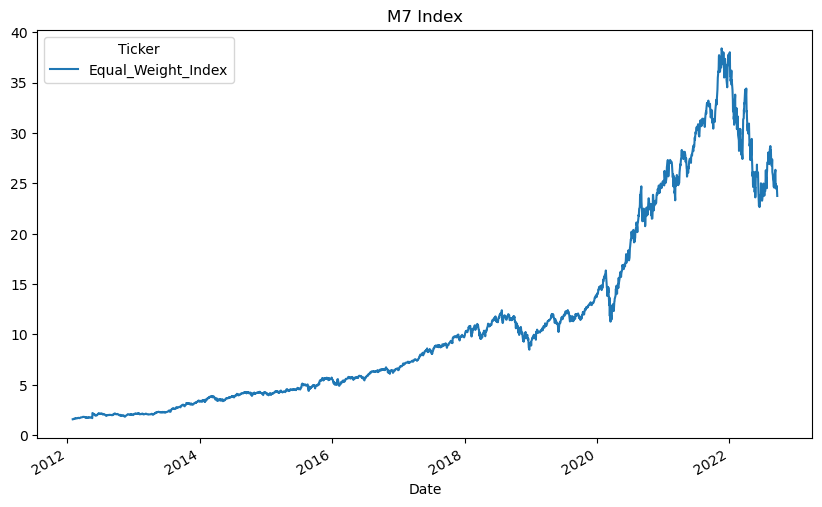

In [16]:
# visualize the index
data[['Equal_Weight_Index']].plot(title='M7 Index', figsize=(10, 6))

### Weekly Performance

The stock data is aggregated weekly to align with the news data's timeframe. Weeks exhibiting a positive percentage change compared to the previous week in stock prices are labeled as ‘bull’ markets, whereas those with a negative change are classified as ‘bear’ markets.

In [17]:
# Define a function to classify the market condition
def classify_market(change):
    if pd.isna(change):
        return 'Neutral'  # or 'Unknown', or you could drop these rows later
    return 'Bull' if change > 0 else 'Bear'

In [18]:
## This cell calculates the weekly percentage change of the index
# Resample the data to get the last value of each week
weekly_data = data['Equal_Weight_Index'].resample('W').last()

# Calculate the weekly percentage change
weekly_percentage_change = weekly_data.pct_change() * 100

# Convert the weekly percentage change to a DataFrame
weekly_percentage_change_df = weekly_percentage_change.to_frame(name='Weekly_Percentage_Change')

# Drop rows with NaN values
weekly_percentage_change_df.dropna(inplace=True)

In [19]:
# Apply the function to the 'Monthly_Percentage_Change' column
weekly_percentage_change_df['Market_Condition'] = weekly_percentage_change_df['Weekly_Percentage_Change'].apply(classify_market)

weekly_change = weekly_percentage_change_df.copy()
weekly_change

,Weekly_Percentage_Change,Market_Condition
Date,,
2012-02-12,2.023762,Bull
2012-02-19,1.564837,Bull
2012-02-26,0.945408,Bull
2012-03-04,1.950662,Bull
2012-03-11,-0.591705,Bear
...,...,...
2022-08-28,-5.229227,Bear
2022-09-04,-5.530200,Bear
2022-09-11,5.302809,Bull


## 2.Load spacY Libraries and NLP pipeline

In [20]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [21]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [22]:
news_df['summary'] = news_df['short_description'].str.lower()

In [23]:
# stop words removal
import string
from spacy.lang.en.stop_words import STOP_WORDS
import spacy

# stopwords
stop_words = STOP_WORDS

# define a function to remove stopwords
def tokenize_docs(doc):
  tokens = [tok.lemma_.lower() for tok in doc if not tok.is_punct and not tok.is_space]
  return [tok for tok in tokens if tok not in stop_words]

In [24]:
# processes the text in nlp.pipe batches
news_df['headline_processed'] = list(nlp.pipe(news_df.headline))

In [25]:
# Convert all non-string entries in the 'summary' column to strings
news_df['summary'] = news_df['summary'].apply(lambda x: str(x) if not isinstance(x, str) else x)

# use nlp.pipe to process the 'summary' text in batches
news_df['summary_processed'] = list(nlp.pipe(news_df['summary']))

## 3. Tf-idf

### Calculate TF-IDF Scores for the Aggregated Weekly Text 

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tokenize_docs(doc):
    doc = nlp(doc)
    tokens = [tok.lemma_.lower() for tok in doc if not tok.is_punct and not tok.is_space]
    return [tok for tok in tokens if tok not in stop_words]

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_docs, token_pattern=None, lowercase=False) # min_df can be set if desired

# Fit the vectorizer to the aggregated weekly text
tfidf_matrix = tfidf_vectorizer.fit_transform(weekly_aggregated_text)

# Create a DataFrame for the TF-IDF scores
weekly_tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=weekly_aggregated_text.index, columns=tfidf_vectorizer.get_feature_names_out())
weekly_tfidf_df.columns = tfidf_vectorizer.get_feature_names_out() # this method returns the vocabulary
print(f'Dataframe Shape: {weekly_tfidf_df.shape}')
weekly_tfidf_df.head()



Dataframe Shape: (384, 5172)


,$,+,+44,--harita,-0.14,-and,.32,.jpeg,00,04:24,...,zoonosis,zora,zuckerberg,zuckerborg,zuckerburg,zvelo,|,£,’,👋
date,,,,,,,,,,,,,,,,,,,,,
2012-01-29,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2012-02-05,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.067085,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2012-02-12,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.133644,0.0,0.0,0.0,0.0
2012-02-19,0.059464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2012-02-26,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


### Frequency Graph

Text(0.5, 1.0, 'Term Frequency Distribution')

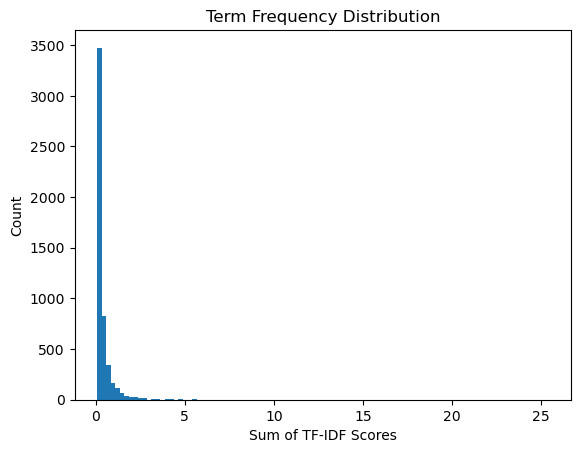

In [49]:
import matplotlib.pyplot as plt
weekly_tfidf_df.sum().plot.hist(bins=100)
plt.xlabel('Sum of TF-IDF Scores')
plt.ylabel('Count')
plt.title('Term Frequency Distribution')

Text(0.5, 1.0, 'Term Frequency Distribution')

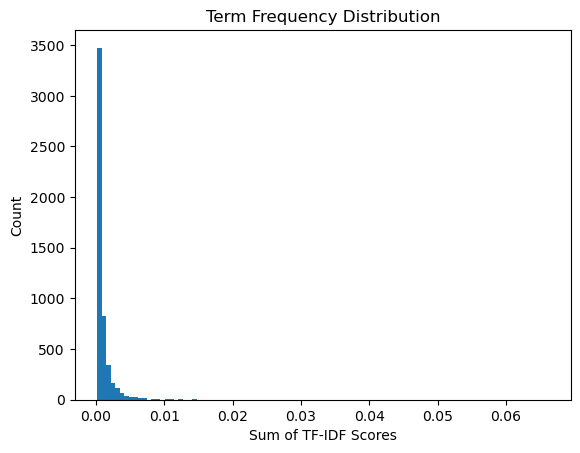

In [50]:
import matplotlib.pyplot as plt
weekly_tfidf_df.mean().plot.hist(bins=100)
plt.xlabel('Sum of TF-IDF Scores')
plt.ylabel('Count')
plt.title('Term Frequency Distribution')

The term frequency distribution displayed in the graph emphasizes the extensive and varied vocabulary present within the dataset, with most words exhibiting infrequent usage, having tf-idf scores less than 3. The graph shows a drastic decline in the count of words as their frequency increases, suggesting a steep drop-off in the number of words that occur more frequently

### Align the TF-IDF DataFrame with weekly_change_df

In [28]:
# set the index of DataFrame to datetime
weekly_tfidf_df.index = pd.to_datetime(weekly_tfidf_df.index)
weekly_change.index = pd.to_datetime(weekly_change.index)


# Align and join the DataFrames
merged_df_weekly = weekly_tfidf_df.join(weekly_change, how='inner')
merged_df_weekly.head()

,$,+,+44,--harita,-0.14,-and,.32,.jpeg,00,04:24,...,zuckerberg,zuckerborg,zuckerburg,zvelo,|,£,’,👋,Weekly_Percentage_Change,Market_Condition
2012-02-12,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.133644,0.0,0.0,0.0,0.0,2.023762,Bull
2012-02-19,0.059464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.564837,Bull
2012-02-26,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.945408,Bull
2012-03-04,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.950662,Bull
2012-03-11,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-0.591705,Bear


## 4. Logistic Regression

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

# Split the data into features and target variable
X = merged_df_weekly.drop(['Market_Condition','Weekly_Percentage_Change'], axis=1)
y = merged_df_weekly['Market_Condition']

# Encode the target variable (if it's not already numerical)
y_encoded = y.apply(lambda x: 1 if x == 'Bull' else 0)

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.60      1.00      0.75        46

    accuracy                           0.60        77
   macro avg       0.30      0.50      0.37        77
weighted avg       0.36      0.60      0.45        77



/Users/minwoo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/minwoo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/minwoo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
class_counts = y_train.value_counts()

# Calculate the ratio
ratio_1_to_0 = class_counts[1] / class_counts[0]

print("Train class counts:\n", class_counts)
print("Ratio of class '1' to class '0':", ratio_1_to_0)
print('')


# Count occurrences of each class
class_counts = y_test.value_counts()

# Calculate the ratio
ratio_1_to_0 = class_counts[1] / class_counts[0]

print("Test class counts:\n", class_counts)
print("Ratio of class '1' to class '0':", ratio_1_to_0)


Train class counts:
 1    183
0    122
Name: Market_Condition, dtype: int64
Ratio of class '1' to class '0': 1.5

Test class counts:
 1    46
0    31
Name: Market_Condition, dtype: int64
Ratio of class '1' to class '0': 1.4838709677419355


In [31]:
# Assuming the feature names and coefficients align in length
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = logistic_model.coef_.flatten()

# Creating the DataFrame directly without dict comprehension to avoid any potential misalignment
coef_df = pd.DataFrame(list(zip(coefficients, feature_names)), columns=['coefficients', 'vocabulary'])
coef_df.head()


# Sort the DataFrame by 'coefficients' in ascending order
sorted_coef_df = coef_df.sort_values(by='coefficients')

# Select the bottom 20 (smallest coefficients)
lowest = sorted_coef_df.head(20).reset_index(drop=True)
lowest.columns = [col+'_1' for col in lowest.columns]

# Select the top 20 (largest coefficients)
highest = sorted_coef_df.tail(20).sort_values(by='coefficients', ascending=False).reset_index(drop=True)
highest.columns = [col+'_2' for col in highest.columns]

# Concatenate the two resulting DataFrames for comparison
comparison_df = pd.concat([lowest, highest], axis=1)

comparison_df

,coefficients_1,vocabulary_1,coefficients_2,vocabulary_2
0,-0.706045,netflix,0.381522,police
1,-0.543875,new,0.362692,write
2,-0.511093,coronavirus,0.359121,day
3,-0.449420,instagram,0.338447,change
4,-0.445464,inc.,0.337416,block
5,-0.415365,review,0.336891,giant
6,-0.411239,york,0.336798,issue
7,-0.409977,founder,0.332551,follow
8,-0.399298,wokka,0.314322,google
9,-0.393518,project,0.303604,page


Despite employing the 'stratify' option in the train_test_split method to maintain proportionate class distributions, the model's performance did not meet expectations.

The precision, recall, and F1-score for class 0 are all zero, indicating the model's inability to identify any true positives for the 'Bear' market category. Essentially, the model defaulted to predicting each instance as class 1, the 'Bull' market, which suggests it was unable to distinguish between the two market conditions.

This outcome led me to consider that the model's shortcomings might come from an underlying class imbalance issue. To address this, I explored the technique of oversampling the minority class, which in this case is the 'Bear' market category. The subsequent sections will outline the process of class rebalancing through oversampling and the results in model performance.

## Oversampling

In [32]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

# Split by class
majority = merged_df_weekly[merged_df_weekly["Market_Condition"] == "Bull"]
minority = merged_df_weekly[merged_df_weekly["Market_Condition"] == "Bear"]

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,     # sample with replacement
                              n_samples=len(majority),    # to match majority class
                              random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority, minority_upsampled])

# Encode 'Market_Condition' to 0s and 1s
label_encoder = LabelEncoder()
y_upsampled_encoded = label_encoder.fit_transform(upsampled['Market_Condition'])

# Print the mapping to verify which label is 0 and which is 1
print(label_encoder.classes_)  # first class being mapped to 0, second to 1

# Split the upsampled dataset back into X and y
X_upsampled = upsampled.drop(['Market_Condition', 'Weekly_Percentage_Change'], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled_encoded, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


['Bear' 'Bull']
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        43
           1       0.80      0.88      0.83        49

    accuracy                           0.82        92
   macro avg       0.82      0.81      0.81        92
weighted avg       0.82      0.82      0.81        92



In [33]:
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = lr_model.coef_.flatten()

# Creating the DataFrame directly without dict comprehension to avoid any potential misalignment
coef_df = pd.DataFrame(list(zip(coefficients, feature_names)), columns=['coefficients', 'vocabulary'])

# Sort the DataFrame by 'coefficients' in ascending order
sorted_coef_df = coef_df.sort_values(by='coefficients')

# Select the bottom 20 (smallest coefficients)
lowest = sorted_coef_df.head(20).reset_index(drop=True)
lowest.columns = [col+'_1' for col in lowest.columns]

# Select the top 20 (largest coefficients)
highest = sorted_coef_df.tail(20).sort_values(by='coefficients', ascending=False).reset_index(drop=True)
highest.columns = [col+'_2' for col in highest.columns]

# Concatenate the two resulting DataFrames for comparison
comparison_df = pd.concat([lowest, highest], axis=1)

comparison_df


,coefficients_1,vocabulary_1,coefficients_2,vocabulary_2
0,-0.994463,instagram,0.674578,apple
1,-0.681186,new,0.597972,ceo
2,-0.631041,search,0.509198,write
3,-0.570428,book,0.436564,’
4,-0.568479,review,0.424302,support
5,-0.558556,facebook,0.412523,issue
6,-0.556850,compare,0.400334,life
7,-0.548406,man,0.394362,word
8,-0.536295,educational,0.392295,article
9,-0.521765,election,0.389849,join


The unsampled logistic regression model favored the 'Bull' market predictions, completely missing the 'Bear' market with a 0% precision and recall for class 0. After resampling to balance classes, the model's performance improved dramatically, achieving high precision (0.97) and good recall (0.66) for 'Bear' markets, and decent precision (0.73) with excellent recall (0.98) for 'Bull' markets. Overall accuracy rose from 60% to 82%, indicating a more balanced and effective model post-resampling.

In [34]:
print(majority.shape)
print(minority.shape)

(229, 5174)
(153, 5174)


## Undersampling


In [35]:
# Split by class
majority = merged_df_weekly[merged_df_weekly["Market_Condition"] == "Bull"]
minority = merged_df_weekly[merged_df_weekly["Market_Condition"] == "Bear"]

# Undersample majority class
majority_undersampled = resample(majority,
                                 replace=False,    # sample without replacement
                                 n_samples=len(minority),  # to match minority class
                                 random_state=42)   # reproducible results

# Combine undersampled majority class with minority class
balanced_df = pd.concat([majority_undersampled, minority])

# Encode 'Market_Condition' to 0s and 1s
label_encoder = LabelEncoder()
y_undersampled_encoded = label_encoder.fit_transform(balanced_df['Market_Condition'])

# Print the mapping to verify which label is 0 and which is 1
print(label_encoder.classes_)  # first class being mapped to 0, second to 1

# Split the balanced dataset back into X and y
X_undersampled = balanced_df.drop(['Market_Condition', 'Weekly_Percentage_Change'], axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled_encoded, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
lr_model2 = LogisticRegression(random_state=42)
lr_model2.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model2.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

['Bear' 'Bull']
              precision    recall  f1-score   support

           0       0.44      0.53      0.48        30
           1       0.46      0.38      0.41        32

    accuracy                           0.45        62
   macro avg       0.45      0.45      0.45        62
weighted avg       0.45      0.45      0.45        62



In [36]:
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = lr_model2.coef_.flatten()

# Creating the DataFrame directly without dict comprehension to avoid any potential misalignment
coef_df = pd.DataFrame(list(zip(coefficients, feature_names)), columns=['coefficients', 'vocabulary'])

# Sort the DataFrame by 'coefficients' in ascending order
sorted_coef_df = coef_df.sort_values(by='coefficients')

# Select the bottom 20 (smallest coefficients)
lowest = sorted_coef_df.head(20).reset_index(drop=True)
lowest.columns = [col+'_1' for col in lowest.columns]

# Select the top 20 (largest coefficients)
highest = sorted_coef_df.tail(20).sort_values(by='coefficients', ascending=False).reset_index(drop=True)
highest.columns = [col+'_2' for col in highest.columns]

# Concatenate the two resulting DataFrames for comparison
comparison_df = pd.concat([lowest, highest], axis=1)

comparison_df

,coefficients_1,vocabulary_1,coefficients_2,vocabulary_2
0,-0.629570,new,0.505759,google
1,-0.490266,check,0.424900,police
2,-0.462285,search,0.391663,day
3,-0.447334,facebook,0.385245,’
4,-0.420297,instagram,0.353762,block
5,-0.405696,music,0.353719,car
6,-0.388461,tell,0.350397,form
7,-0.386798,billion,0.338391,realize
8,-0.384681,website,0.335607,video
9,-0.327535,2016,0.313670,lawsuit


The analysis of the top 20 words with the highest and lowest coefficients reveals no strong indicators of market direction. Positive coefficients feature company names and products like Google, cloud, and iPad, but no clear pattern emerges. Similarly, negative coefficients include company names such as SpaceX, Insta, SolarCity, Hulu, Facebook, and terms like 'chatbot,' with 'problem' notably associated with negative sentiment. The presence of competitor company names in the negative coefficient list may suggest an inverse relationship to the performance of the major firms studied. Overall, the vocabulary does not provide a definitive guide to predicting market movements.

## 5. Multinomial Naive Bayes

In [37]:
merged_df_weekly.head()

,$,+,+44,--harita,-0.14,-and,.32,.jpeg,00,04:24,...,zuckerberg,zuckerborg,zuckerburg,zvelo,|,£,’,👋,Weekly_Percentage_Change,Market_Condition
2012-02-12,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.133644,0.0,0.0,0.0,0.0,2.023762,Bull
2012-02-19,0.059464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.564837,Bull
2012-02-26,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.945408,Bull
2012-03-04,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.950662,Bull
2012-03-11,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-0.591705,Bear


In [38]:
from sklearn.naive_bayes import MultinomialNB  

# Drop 'Market_Condition' and 'Weekly_Percentage_Change' to define your features
X = merged_df_weekly.drop(['Market_Condition', 'Weekly_Percentage_Change'], axis=1)
# Define your target variable
y = merged_df_weekly['Market_Condition']

# Encode the target variable (if it's not already numerical)
y_encoded = y.apply(lambda x: 1 if x == 'Bull' else 0)

# Train-test split with stratification to ensure that your training and testing sets have a similar proportion of class labels
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize and train the Multinomial Naive Bayes model
# Note: MultinomialNB doesn't require setting a maximum number of iterations
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.60      1.00      0.75        46

    accuracy                           0.60        77
   macro avg       0.30      0.50      0.37        77
weighted avg       0.36      0.60      0.45        77



/Users/minwoo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/minwoo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/minwoo/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get log probabilities of each feature for each class
log_prob = nb_model.feature_log_prob_

# Convert log probabilities to DataFrame for easier manipulation
df_feature_importances = pd.DataFrame(log_prob, columns=feature_names).T

# Now df_feature_importances[0] corresponds to 'decrease', df_feature_importances[1] corresponds to 'increase'

# Top 20 words increasing the chance of 'decrease'
top_decreasing = df_feature_importances[0].sort_values(ascending=False).head(20)

# Top 20 words increasing the chance of 'increase'
top_increasing = df_feature_importances[1].sort_values(ascending=False).head(20)

# Combine for comparison
comparison_df = pd.concat([top_decreasing, top_increasing], axis=1, keys=['Decrease', 'Increase'])

print(comparison_df)

           Decrease  Increase
facebook  -6.429462 -6.203588
apple     -6.808088 -6.622167
google    -7.040735 -6.608143
amazon    -7.194039 -6.864853
new       -7.247151 -7.357200
post      -7.366788 -7.200233
like      -7.370864 -7.311315
twitter   -7.446548 -7.368784
social    -7.531967       NaN
company   -7.551956 -7.415037
medium    -7.554758       NaN
photo     -7.599780       NaN
year      -7.606771 -7.425783
come      -7.664565       NaN
tesla     -7.665926       NaN
check     -7.676051       NaN
people    -7.694968 -7.522927
week      -7.698043 -7.555665
instagram -7.706240       NaN
use       -7.715599 -7.518594
page            NaN -7.325046
ceo             NaN -7.347892
day             NaN -7.420067
write           NaN -7.471546
change          NaN -7.473412
world           NaN -7.484786
friend          NaN -7.555349


The Multinomial Naive Bayes model results indicate that the model is predicting all instances as class 1, with no true positives for class 0 (precision, recall, and F1-score are all 0.00 for class 0). The model has an overall accuracy of 60%, but this is entirely due to its predictions for class 1, where it has a recall of 1.00 – meaning it correctly identified all actual class 1 instances, but it fails to recognize any instance of class 0.

To mitigate this issue, I applied a similar balancing approach as was done for the logistic regression, aiming to create a more equitable representation of both classes.

## Oversample

In [40]:
from sklearn.naive_bayes import MultinomialNB  
from sklearn.metrics import classification_report

# X_upsampled' and 'y_upsampled_encoded' are from the logistic regression preparation code

# Split the balanced data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled_encoded, test_size=0.2, random_state=42)

# Initialize and train the Multinomial Naive Bayes model
nb_model_balanced = MultinomialNB()
nb_model_balanced.fit(X_train, y_train)

# Predict on the test set
y_pred_balanced = nb_model_balanced.predict(X_test)

# Evaluate the model using the balanced dataset
report_balanced = classification_report(y_test, y_pred_balanced)
print(report_balanced)


              precision    recall  f1-score   support

           0       0.59      0.84      0.69        43
           1       0.77      0.49      0.60        49

    accuracy                           0.65        92
   macro avg       0.68      0.66      0.65        92
weighted avg       0.69      0.65      0.64        92



The oversampled model demonstrates improved balance in recognizing both market conditions. Class 0 shows a signifi-cant improvement with a precision of 0.59, recall of 0.84, and F1-score of 0.69. Class 1's metrics, however, decrease com-pared to the baseline, with a precision of 0.77, recall of 0.49, and F1-score of 0.60. Overall accuracy slightly improves to 0.65, reflecting a better balanced but still imperfect model.

In [41]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get log probabilities of each feature for each class
log_prob = nb_model_balanced.feature_log_prob_

# Convert log probabilities to DataFrame for easier manipulation
df_feature_importances = pd.DataFrame(log_prob, columns=feature_names).T

# Now df_feature_importances[0] corresponds to 'decrease', df_feature_importances[1] corresponds to 'increase'

# Top 20 words increasing the chance of 'decrease'
top_decreasing = df_feature_importances[0].sort_values(ascending=False).head(20)

# Top 20 words increasing the chance of 'increase'
top_increasing = df_feature_importances[1].sort_values(ascending=False).head(20)

# Combine for comparison
comparison_df = pd.concat([top_decreasing, top_increasing], axis=1, keys=['Decrease', 'Increase'])

print(comparison_df)


           Decrease  Increase
facebook  -6.051006 -6.205321
amazon    -6.710791 -6.818880
google    -6.842611 -6.788399
apple     -6.856321 -6.559817
new       -6.900823 -7.345811
post      -7.024418 -7.068523
instagram -7.096177       NaN
twitter   -7.174241 -7.343999
like      -7.232266 -7.405692
social    -7.298016       NaN
people    -7.303251 -7.539326
want      -7.347507       NaN
page      -7.358614 -7.432559
president -7.391024       NaN
search    -7.397434       NaN
photo     -7.407157       NaN
million   -7.411057       NaN
use       -7.432722       NaN
medium    -7.455976       NaN
week      -7.462656 -7.439762
ceo             NaN -7.318838
day             NaN -7.362501
year            NaN -7.377159
time            NaN -7.426818
write           NaN -7.438192
change          NaN -7.445793
tesla           NaN -7.521317
company         NaN -7.535181
right           NaN -7.542387


Words like "facebook", "amazon", "google", and "apple" have negative log probabilities in both categories, but the values are closer for "Decrease", suggesting a slightly stronger associa-tion with negative market trends. The words exclusively men-tioned in the "Increase" category, such as "CEO," "company," "Tesla," "day," "year," "time," "write," "change," and "right," are predominantly linked to business, corporate actions, and temporal events. They reflect optimism associated with corpo-rate progress, strategic changes, and significant temporal mark-ers and view as indicators of positive developments in the market.
Certain terms such as "instagram", "social", "want", "presi-dent", "search", "photo", "million", "use", "medium", and a few others appear only under the "Decrease" category, or have a NaN (not a number) under "Increase", indicating these words are strongly associated with market declines. These words are commonly relate to social media, public communication, and personal interactions. These terms suggest a focus on general social engagement and media discourse, which might be asso-ciated with periods of negative sentiment when frequently mentioned in financial news. Additionally, the presence of words like "president" and "million" could indicate discus-sions surrounding political events or high-stake financial news.

## Undersample

In [42]:
# Undersample majority class
majority_undersampled = resample(majority,
                                 replace=False,    # sample without replacement
                                 n_samples=len(minority),  # to match minority class
                                 random_state=42)   # reproducible results

# Combine undersampled majority class with minority class
balanced_df = pd.concat([majority_undersampled, minority])

# Encode 'Market_Condition' to 0s and 1s
label_encoder = LabelEncoder()
y_undersampled_encoded = label_encoder.fit_transform(balanced_df['Market_Condition'])

# Print the mapping to verify which label is 0 and which is 1
print(label_encoder.classes_)  # first class being mapped to 0, second to 1

# Split the balanced dataset back into X and y
X_undersampled = balanced_df.drop(['Market_Condition', 'Weekly_Percentage_Change'], axis=1)
y_undersampled = y_undersampled_encoded

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)

# Initialize and train the Multinomial Naive Bayes model
nb_model_under = MultinomialNB()
nb_model_under.fit(X_train, y_train)

# Predict on the test set
y_pred_balanced = nb_model_under.predict(X_test)

# Evaluate the model using the balanced dataset
report_balanced = classification_report(y_test, y_pred_balanced)
print(report_balanced)


['Bear' 'Bull']
              precision    recall  f1-score   support

           0       0.47      0.57      0.52        30
           1       0.50      0.41      0.45        32

    accuracy                           0.48        62
   macro avg       0.49      0.49      0.48        62
weighted avg       0.49      0.48      0.48        62



The undersampled approach results in the lowest overall accu-racy of 0.48. It offers more balanced performance between clas-ses than the baseline model but still shows moderate effec-tiveness. Class 0 has a precision of 0.47, recall of 0.57, and F1-score of 0.52. Class 1 scores are closely aligned with those of Class 0, with a precision of 0.50, recall of 0.41, and F1-score of 0.45.

In [43]:
# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get log probabilities of each feature for each class
log_prob = nb_model_under.feature_log_prob_

# Convert log probabilities to DataFrame for easier manipulation
df_feature_importances = pd.DataFrame(log_prob, columns=feature_names).T

# Now df_feature_importances[0] corresponds to 'decrease', df_feature_importances[1] corresponds to 'increase'

# Top 20 words increasing the chance of 'decrease'
top_decreasing = df_feature_importances[0].sort_values(ascending=False).head(20)

# Top 20 words increasing the chance of 'increase'
top_increasing = df_feature_importances[1].sort_values(ascending=False).head(20)

# Combine for comparison
comparison_df = pd.concat([top_decreasing, top_increasing], axis=1, keys=['Decrease', 'Increase'])

print(comparison_df)


           Decrease  Increase
facebook  -6.380001 -6.528676
apple     -6.907361 -6.848550
google    -7.025594 -6.783970
amazon    -7.211033 -7.212333
new       -7.218035 -7.718489
post      -7.334369 -7.253621
like      -7.378605 -7.442366
social    -7.455502       NaN
twitter   -7.466043 -7.619260
medium    -7.513919       NaN
company   -7.546127 -7.604516
check     -7.555958       NaN
people    -7.591345 -7.573469
week      -7.599888       NaN
search    -7.608428       NaN
photo     -7.676280       NaN
page      -7.682370 -7.718666
know      -7.717281       NaN
user      -7.722594       NaN
instagram -7.726890       NaN
world           NaN -7.528016
day             NaN -7.530857
ceo             NaN -7.558160
change          NaN -7.598429
time            NaN -7.636536
year            NaN -7.665409
video           NaN -7.674972
’               NaN -7.763141
trump           NaN -7.769182


## Gradient Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

# Drop 'Market_Condition' and 'Weekly_Percentage_Change' to define your features
X = merged_df_weekly.drop(['Market_Condition', 'Weekly_Percentage_Change'], axis=1)
# Define your target variable
y = merged_df_weekly['Market_Condition']


# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Initialize the Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state=42)
gbc_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gbc_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.13      0.17        31
           1       0.56      0.76      0.65        46

    accuracy                           0.51        77
   macro avg       0.42      0.44      0.41        77
weighted avg       0.44      0.51      0.46        77



For Class 0, representing a decreasing market, the model shows a precision of 0.27, recall of 0.13, and an F1 score of 0.17, sug-gesting a lower predictive accuracy for this category. In con-trast, for Class 1, corresponding to an increasing market, the model achieves better precision at 0.56, recall at 0.76, and an F1 score of 0.65, indicating a relatively higher accuracy in identifying bullish trends. Overall, the model attains an accu-racy of 0.51.

In [45]:
feature_importances = gbc_model.feature_importances_
features_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
features_df = features_df.sort_values(by='importance', ascending=False)

# Display the top 50 most influential features
print(features_df.head(20))

          feature  importance
3172      netflix    0.067033
3067       moment    0.042111
994            co    0.036104
2384         inc.    0.033939
2679         lady    0.024806
2457    instagram    0.019853
2959       medium    0.018780
879     challenge    0.018093
2781         live    0.017360
858     celebrate    0.016989
3589         post    0.015890
1285          day    0.015725
5153         york    0.015015
3948       reveal    0.014629
4113       search    0.014331
3391        panel    0.013926
1620  enforcement    0.013888
1566       effort    0.013534
571        beauty    0.013142
5001          war    0.012979


The feature importance from the Gradient Boosting model reveals key influences on market trends, with high-ranking words like "Netflix," "Instagram," and corporate identifiers like "inc." and "co." suggesting the impact of media, entertain-ment, and company-specific news. Social dynamics captured by terms such as "challenge" and "celebrate," along with refer-ences to events ("moment," "live") and locations ("York"), indicate a connection between public sentiment and market behavior. Additionally, "enforcement" and "war" reflect the market's sensitivity to regulatory actions and geopolitical events, underscoring the complex interplay between diverse societal factors and financial market reactions.

## Conclusion and Future Work
The analysis of machine learning models including Logistic Regression, Multinomial Naive Bayes, and Gradient Boosting has provided deep insights into stock market trends. Logistic Regression showed clear patterns linked to market sentiment, while Multinomial Naive Bayes highlighted key terms driving market movements. The Gradient Boosting Model indicated that media influence, social dynamics, corporate activities, and broader socioeconomic factors significantly impact market behavior.

Among these, the Oversampled Logistic Regression model excelled, showing superior performance with an overall accuracy of 0.82. It achieved a precision of 0.84 and recall of 0.74 for bear market predictions (class 0), and a precision of 0.80 and recall of 0.88 for bull markets (class 1), outperforming other models including Gradient Boosting.

This study underscores the utility of TF-IDF extracted linguis-tic features and demonstrates the potential of NLP in financial market analysis. The results confirm that even with varying levels of model success, valuable market insights can be gleaned from the careful application of machine learning techniques to financial news text data.

For future work, enriching the dataset with content from specialized financial platforms such as The Economist and Financial Times could deepen the insights. Inclusion of comprehensive news coverage from leading outlets like The New York Times would also broaden the scope of financial news analysis.The choice of weekly data aggregation was made to streamline computations, yet it limited the dataset's size. Future research should consider a daily analysis to capture more granular market fluctuations. Moreover, redefining bear and bull markets with a more refined threshold than simply the zero percent change could significantly improve the precision of the analysis.
